In [122]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [123]:
df=pd.read_csv("Advertising Sales Channel Prediction.csv") #reading the csv file
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


I have imported my dataset.And i can observe that my target i.e.,sales column data is a continuous type data,So it's a Regression problem.

And the Unnamed: 0 column was the index column in our raw data set, it has nothing to do in my model training so i'll drop it here itself.

In [124]:
#Droping Unnamed:0 column since it was the index column in raw data set.It has nothing to do with my model training.
df = df.drop(["Unnamed: 0"],axis=1)

In [125]:
#dataframe after removing index column
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA:

In [126]:
#Checking shape of dataset
df.shape


(200, 4)

In [127]:
#reading all column names
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [128]:
#Checking data types of each feature
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [129]:
#Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [130]:
#Checking unique values in each column
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [131]:
#Checking the number of null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

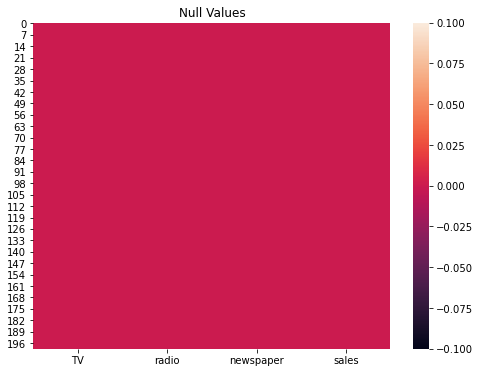

In [132]:
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [133]:
#Checking unique values in target column
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [134]:
#Checking for any empty observation in target column
df.loc[df['sales'] == " "]

,TV,radio,newspaper,sales


In [135]:
#Checking for value count of target column
df['sales'].value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

In [136]:
#describing the data set
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualization:

# Univariate Analysis:

<AxesSubplot:xlabel='TV', ylabel='Density'>

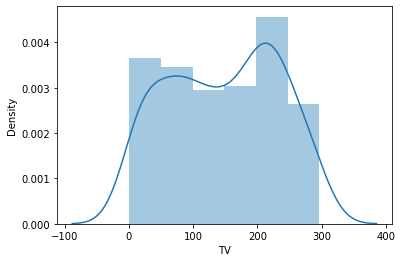

In [137]:
#distplot for TV
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

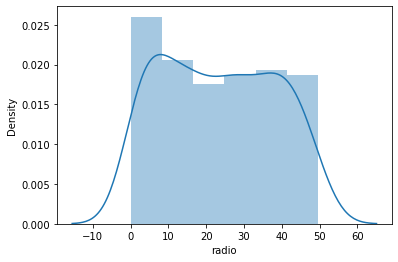

In [138]:
#distplot for radio
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

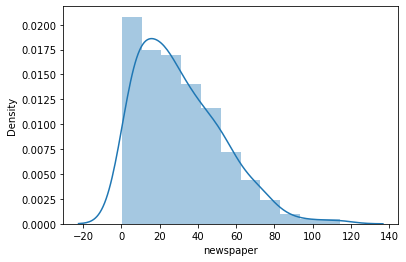

In [139]:
#distplot for newspaper
sns.distplot(df['newspaper'])

Newspaper column is bit skewed

<AxesSubplot:xlabel='sales', ylabel='Density'>

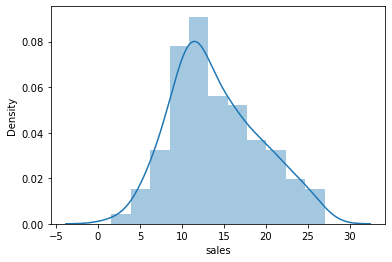

In [140]:
#distplot for sales
sns.distplot(df['sales'])

My target column sales is also almost normally distributed.

# Bivariate Analysis:

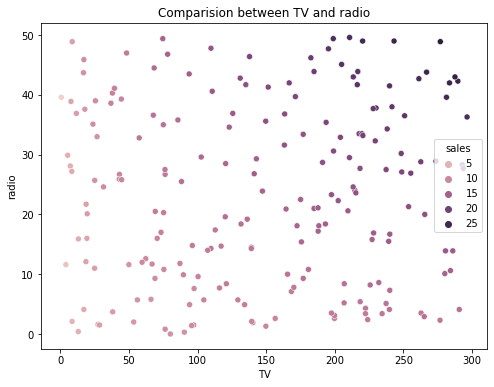

In [141]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

I can observe a scattered format of plotting TV and radio with sales.

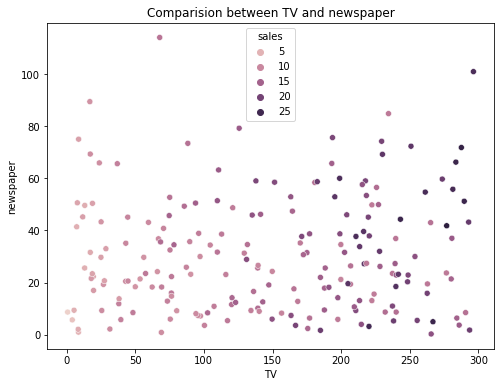

In [142]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

TV and newspaper has a ascending format with sales.

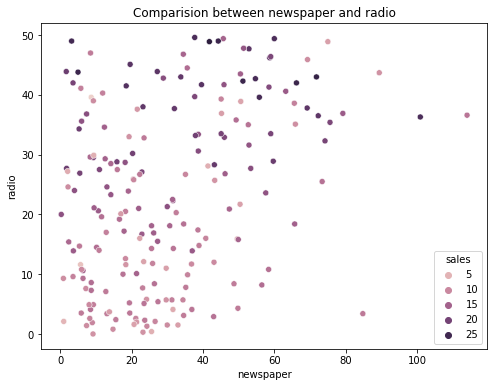

In [143]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between newspaper and radio')
sns.scatterplot(df['newspaper'],df['radio'],hue=df["sales"]);

Newspaper and radio are scattered with sales.

# Multivariate Analysis:

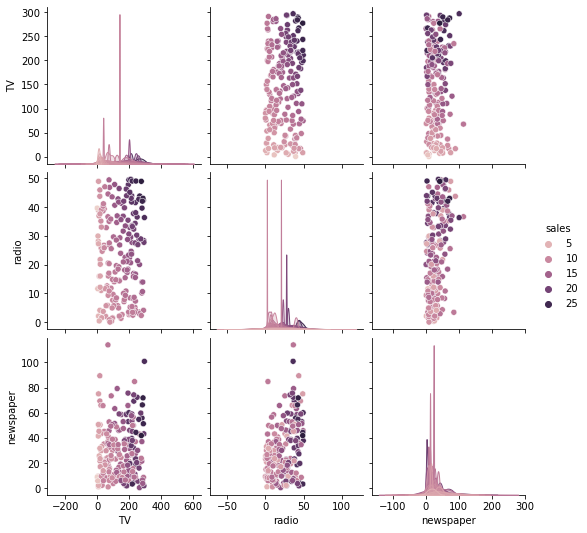

In [144]:
#pair ploting for df
sns.pairplot(df,hue="sales")

Above are the pair plots of my dataset

# Identifying the outliers:

<AxesSubplot:>

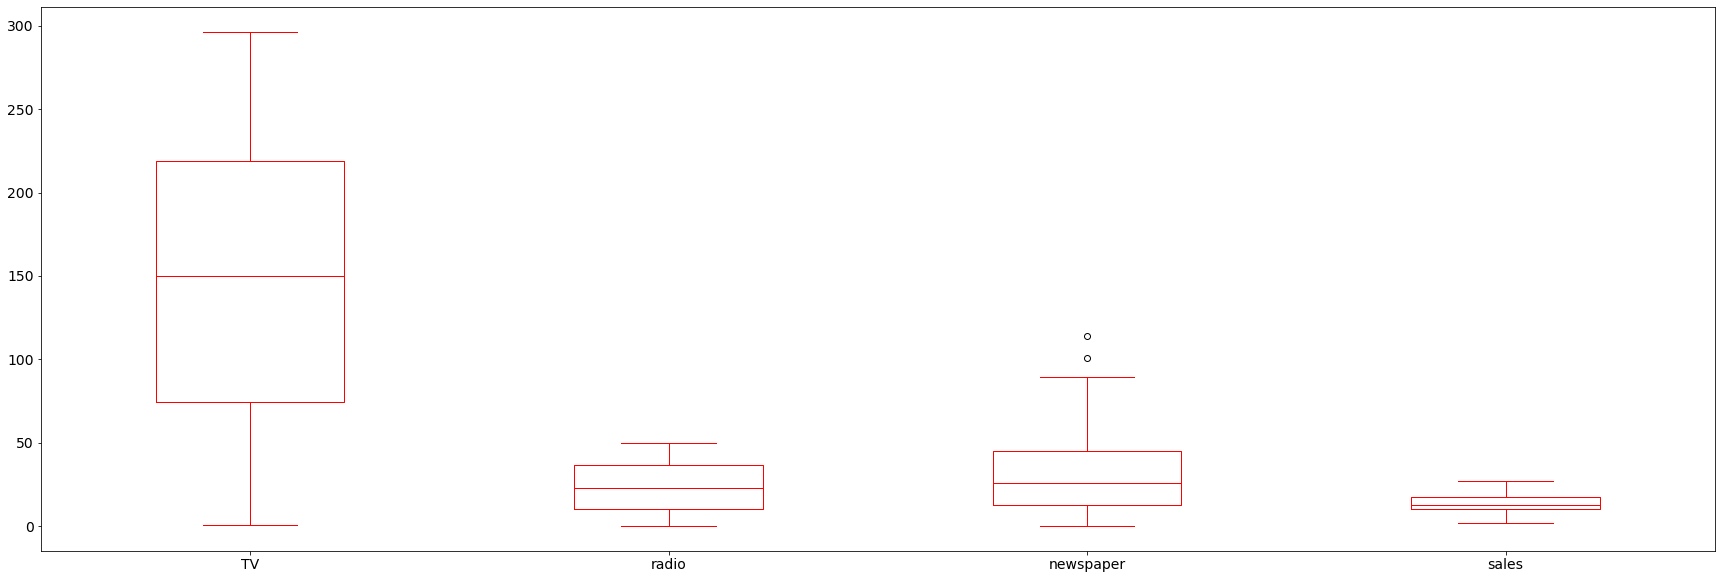

In [145]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

There are outliers in newspaper column.Have to remove outliers in newspaper column.

# Removing outliers:

# i) Zscore method:

In [146]:
dfOutliers = df[["newspaper"]]

Making a list of columns with outliers as dfOutliers.

In [147]:
from scipy.stats import zscore
z=np.abs(zscore(dfOutliers))
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Using Zscore i have removed the outliers.

In [148]:
#Checking the shape of new data
df_new.shape

(198, 4)

In [149]:
#Checking the shape of old dataset
df.shape

(200, 4)

In [150]:
#Checking dataloss in zscore method
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

# ii) IQR method:

In [151]:
Q1=dfOutliers.quantile(0.25)
Q3=dfOutliers.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR method i have removed the outliers.

In [152]:
#Checking shape of new dataset
df_1.shape

(198, 4)

In [153]:
#Checking shape of old dataset
df.shape

(200, 4)

In [154]:
#Checking the data loss after using IQR method.
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

In IQR method also i'm getting 1% data loss.

I can either consider zscore method or IQR method since the dataloss in both the methods is same.Let me stick on to zscore itself.

# Checking for skewness:

In [155]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Removing skewness using yeo-johnson method:

In [156]:
fea=['newspaper']

Created a list with columns having skewness as fea.

In [157]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [158]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [159]:
#Checking skewness after removing skewness from newspaper column.
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

After using yeo-johnson method skewness is completely removed in my dataset.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

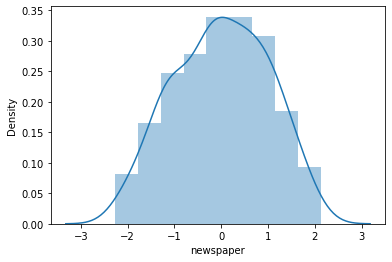

In [160]:
#distplot for newspaper
sns.distplot(df_new['newspaper'])

Newspaper column looks normally distributed compared to old one.

# Correlation matrix with heat map:

In [161]:
cor=df_new.corr()

In [162]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.038288,0.779121
radio,0.051978,1.000000,0.296570,0.576748
newspaper,0.038288,0.296570,1.000000,0.191387
sales,0.779121,0.576748,0.191387,1.000000


Above are the correlations of each feature with all other features.But let me visualize it with heat map to get better visualization on correlations of features.

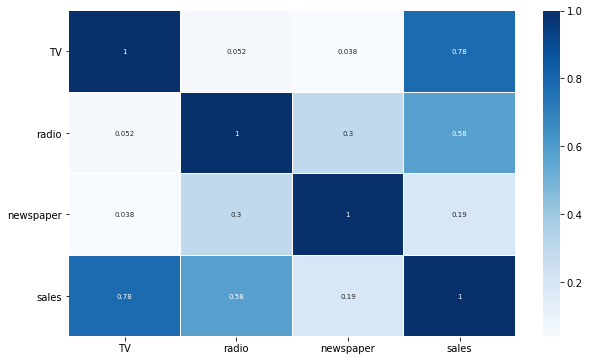

In [163]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

# Visualizing correlations of the target variable using bar plot:

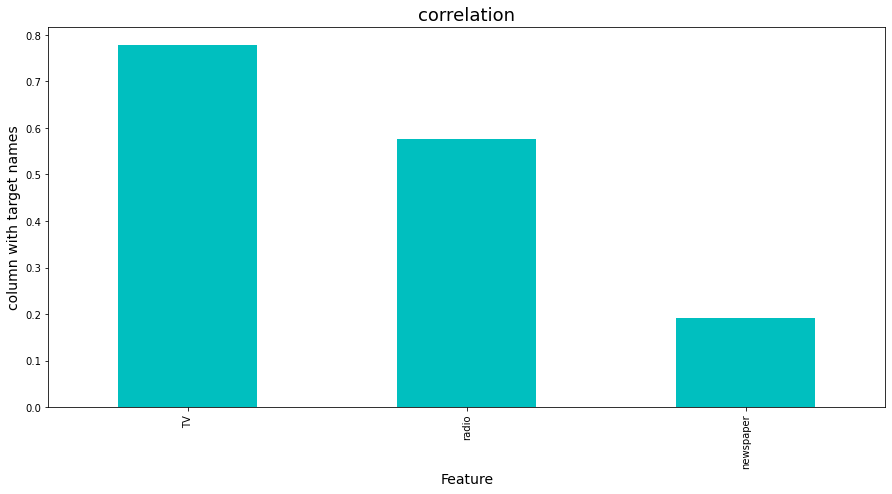

In [164]:
plt.figure(figsize=(15,7))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Newspaper is less correlated comparitively with target variable.

In [165]:
#Printing final dataset after EDA part
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
195,38.2,3.7,-0.687435,7.6
196,94.2,4.9,-1.146090,9.7
197,177.0,9.3,-1.314437,12.8
198,283.6,42.0,1.517395,25.5


# Preprocessing:

In [166]:
x = df_new.drop("sales",axis=1)
y = df_new["sales"]

I took x as all dependent features and y as my target column.

# Scaling the data using MinMax scaler:

In [167]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [168]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

It is the coding for scaling using standard scaler.

In [169]:
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


These are my dependent variable after scaling.

# Finding best Random state and accuracy:

In [170]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


I got the best accuracy and random state.I have used r2_score as metrix.

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Regression algorithms:

In [172]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Linear Regression:

In [173]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9358346827439895


# DecisionTreeRegressor:

In [174]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9581609031467785


# RandomForestRegressor:

In [175]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9735986748244633


# SupportVectorRegressor:

In [176]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9388708730222921


# K-Neighbor Regressor:

In [177]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9418441969804539


# Stochastic Gradient Descent Regressor:

In [178]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9215306169371181


# Cross Validation Score:

In [179]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8857739370001966


In [180]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9484887258592792


In [181]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9765678650591066


In [182]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.91278463451271


In [183]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.9407052322824345


In [184]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8827965005139602


# Hyperparameter tunning:

In [185]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [186]:
parameter = {'n_neighbors':[1,2,3,4,5,6],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_jobs':[1,2,3,4,5]}

Giving SGD parameters.

In [187]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

Running GCV for SGDRegressor.

In [188]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

Tuning the model using GridSearchCV.

In [189]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}

# Got the best parameters for my model.

In [190]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=4,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

94.3463529971545


After tuning KNN model i'm getting 94.35% as best r2_score, which is good!!!

# Saving the model:

In [191]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"AdvertisementSalesChannelPrediction.pkl")

['AdvertisementSalesChannelPrediction.pkl']